### Advanced Machine Learning

# Home Exercise #4

Assignment Due: 17/05/21 23:59

Jonathan Schler

In [1]:
student1Name="Alexander Kruglyak"
student1ID="323637736"


student2Name="Sofya Zubtsovsky"
student2ID="337839112"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The goal of this homework is to try to solve the problem of predicting wine quality from review texts and other properties of the wine. You can find the dataset here:https://www.kaggle.com/zynicide/wine-reviews

While you can find several kernels on kaggle already, I highly recommend you start your ownsolution from scratch. For this homework, only use wine from the United States (only 42% of data). Feel free to subsample the data for building your model.

## Task 1 Bag of Words and simple Features [50pts]

1.1 Create a baseline model for predicting wine quality using only non-text features.





In [6]:
def show_data_basic_information(df):
    print("Info\n")
    print(df.info())
    print("\n" + "*" * 10 + "\n")
    
    print("Shape\n")
    print(df.shape) 
    print("\n" + "*" * 10 + "\n")
    
    print("Amount of is null data\n")
    print(df.isnull().sum().max())
    print("\n" + "*" * 10 + "\n")
    
    print("Describe\n")
    display(df.describe())
    print("\n" + "*" * 10 + "\n")

1.2 Create a simple text-based model using a bag-of-words approach and a linear model.


In [4]:
full_df = pd.read_csv("winemag-data-130k-v2.csv")

In [7]:
show_data_basic_information(full_df)

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), objec

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000



**********



In [9]:
full_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
def take_us_wines(_df):
    df = _df[_df['country']=="US"]
    return df

In [18]:
us_df = take_us_wines(full_df)
show_data_basic_information(us_df)

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             54504 non-null  int64  
 1   country                54504 non-null  object 
 2   description            54504 non-null  object 
 3   designation            36908 non-null  object 
 4   points                 54504 non-null  int64  
 5   price                  54265 non-null  float64
 6   province               54504 non-null  object 
 7   region_1               54226 non-null  object 
 8   region_2               50511 non-null  object 
 9   taster_name            37730 non-null  object 
 10  taster_twitter_handle  34741 non-null  object 
 11  title                  54504 non-null  object 
 12  variety                54504 non-null  object 
 13  winery                 54504 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usag

,Unnamed: 0,points,price
count,54504.000000,54504.00000,54265.000000
mean,65467.828563,88.56372,36.573464
std,37572.539161,3.11484,27.088857
min,2.000000,80.00000,4.000000
25%,33067.750000,86.00000,20.000000
50%,65678.500000,88.00000,30.000000
75%,98191.250000,91.00000,45.000000
max,129967.000000,100.00000,2013.000000



**********



In [16]:
def drop_nan_price(_df):
    df = _df.dropna(subset=['price'])
    return df

In [20]:
print(us_df['price'].isna().sum())
us_df_cleaned = drop_nan_price(us_df)
print(us_df_cleaned['price'].isna().sum())

239
0


In [21]:
def get_categorical_features(df):
    return df.select_dtypes(include=['object'])

In [42]:
def fill_nan_object_column(_df):
    df = _df.copy()
    categorical = get_categorical_features(_df)
    df[categorical.columns] = _df[categorical.columns].fillna("unknown")
    return df

In [43]:
print ('='*10 + " US wines as is\n"+'='*10,us_df_cleaned.isna().sum())
us_df_filled = fill_nan_object_column(us_df_cleaned)
print ('='*10 + " US wines without NaN\n"+'='*10,us_df_filled.isna().sum())

========== US wines as is
========== Unnamed: 0                   0
country                      0
description                  0
designation              17514
points                       0
price                        0
province                     0
region_1                   276
region_2                  3973
taster_name              16754
taster_twitter_handle    19730
title                        0
variety                      0
winery                       0
dtype: int64
========== US wines without NaN
========== Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64


In [55]:
def drop_columns(df, columns):
    return df.copy().drop(columns, axis=1)

def get_label_and_drop(_df):
    df = _df.copy()
    label = df['price']
    df = drop_columns(df,['price'])
    return df, label

In [48]:
irrelevant_columns = ['Unnamed: 0']
us_df_filled = drop_columns(us_df_filled,irrelevant_columns)

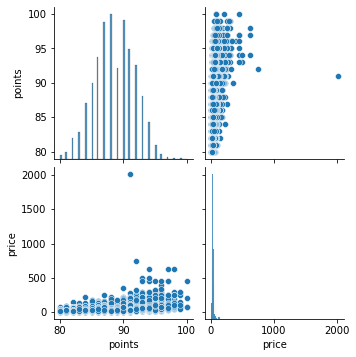

In [49]:
sns.pairplot(us_df_filled)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of price')

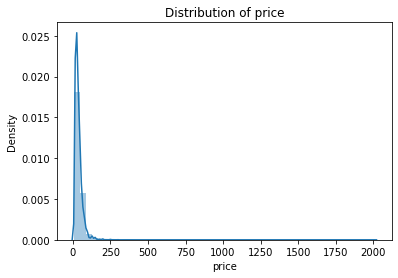

In [54]:
sns.distplot(us_df_filled['price'], hist=True, kde=True)
plt.title("Distribution of price")

In [56]:
def print_unique_count(df):
    for (featureName, featureData) in df.select_dtypes(include=['object']).iteritems():
        print("{} has unique values: {}".format(featureName, featureData.nunique()))

In [57]:
print_unique_count(us_df_filled)

country has unique values: 1
description has unique values: 50230
designation has unique values: 14131
province has unique values: 27
region_1 has unique values: 265
region_2 has unique values: 18
taster_name has unique values: 16
taster_twitter_handle has unique values: 13
title has unique values: 50012
variety has unique values: 257
winery has unique values: 5368


In [82]:
def show_random_text(_df,feature,n=1):
    df = _df.sample(n=n,random_state=42)
    print(list(df[feature]))

In [84]:
show_random_text(us_df_filled,'description')

['Earthy, this wine offers substantial layers of dried herb and cranberry. Denser overtones of oak and tannin are pronounced on the midpalate, the tannins weighty and firm. A lift of acidity picks up on the finish. The wine will benefit from time in the cellar, through 2015.']


In [78]:
show_random_text(us_df_filled,'title')

['Ilsley 2010 Single Vineyard Estate Cabernet Sauvignon (Stags Leap District)']


In [79]:
show_random_text(us_df_filled,'variety')

['Cabernet Sauvignon']


In [80]:
show_random_text(us_df_filled,'winery')

['Ilsley']


1.3 Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets.


In [ ]:
#your code here

1.4 Combine the non-text features and the text features. How does adding those features improve upon just using bag-of-words?

In [ ]:
#your code here

## Task 2 Word Vectors [50pts]

Use a pretrained word-embedding (word2vec, glove or fasttext) for featurization instead of the bag-of-words model. Does this improve classification? How about combining the embedded words with the BoW model?

In [1]:
#your code here

# Task 3 Transformers (bonus / optional) [50pts] - Like Extra Assignment with 50% weight

Fine-tune a BERT model on the text data alone using the transformers library. How does this model compare to a BoW model, and how does it compare to a model using all features?

In [2]:
#your code here